# 1. Intro to Linear Algebra

## 1.1 Scalars, Vectors, Matrices and Tensors

Basic definitions:

- A scalar is a single number or a matrix with a single entry.
- A vector is a 1-d array of numbers. Another way to think of vectors is identifying points in space with each element giving the coordinate along a different axis.

$$
{x} =\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
$$

- A matrix is a 2-D array where each element is identified by two indices (ROW then COLUMN).

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

- A tensor is a $n$-dimensional array with $n>2$

$$
{B}=
\begin{bmatrix}
    \begin{bmatrix}
        A_{0,1,1} & A_{0,1,2} & \cdots & A_{0,1,n} \\\\
        A_{0,2,1} & A_{0,2,2} & \cdots & A_{0,2,n} \\\\
        \cdots & \cdots & \cdots & \cdots \\\\
        A_{0,m,1} & A_{0,m,2} & \cdots & A_{0,m,n}
    \end{bmatrix}
    ...
    \begin{bmatrix}
        A_{k,1,1} & A_{k,1,2} & \cdots & A_{k,1,n} \\\\
        A_{k,2,1} & A_{k,2,2} & \cdots & A_{k,2,n} \\\\
        \cdots & \cdots & \cdots & \cdots \\\\
        A_{k,m,1} & A_{k,m,2} & \cdots & A_{k,m,n}
    \end{bmatrix}
\end{bmatrix}
$$

- In the following code section, we will use the Python Image Library (PIL) or Pillow, and NumPy to manipulate an image in the form of an array.


In [ ]:
from PIL import Image
import numpy as np
from numpy import asarray
# Open the image from working directory
# Upload the image using the files tab on the right hand side 
image = Image.open('ntuce.jpg')
# summarize some details about the image
# print the image format, size and mode. For example, print(image.format)
print(image.format)
print(image.size)
print(image.mode)
# show the image
display(image)

# convert the image to a numpy array using asarray
data = np.asarray(image)
# print the type and shape of data, and the data
print(type(data))
print(data.shape)

print(data)

FileNotFoundError: ignored

# 1.2 Addition

Matrices can be added if they have the same shape:

$${A} + {B} = {C}$$

Each cell of ${A}$ is added to the corresponding cell of ${B}$:

$${A}_{i,j} + {B}_{i,j} = {C}_{i,j}$$

$i$ is the row index and $j$ the column index.

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}+
\begin{bmatrix}
    B_{1,1} & B_{1,2} \\\\
    B_{2,1} & B_{2,2} \\\\
    B_{3,1} & B_{3,2}
\end{bmatrix}=
\begin{bmatrix}
    A_{1,1} + B_{1,1} & A_{1,2} + B_{1,2} \\\\
    A_{2,1} + B_{2,1} & A_{2,2} + B_{2,2} \\\\
    A_{3,1} + B_{3,1} & A_{3,2} + B_{3,2}
\end{bmatrix}
$$

The shape of ${A}$, ${B}$ and ${C}$ are equal

(281, 500)
[[128 128 129 ... 124 124 123]
 [128 128 129 ... 123 124 124]
 [128 128 128 ... 123 124 124]
 ...
 [ 87  87  86 ...  81  82  81]
 [ 72  71  70 ...  80  78  78]
 [ 58  56  56 ...  79  78  78]]


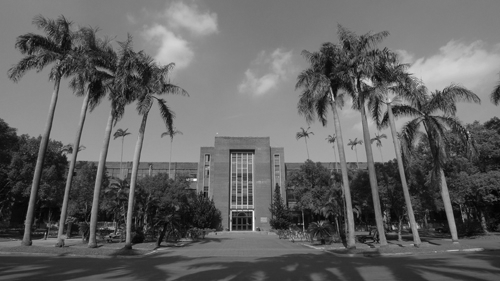

In [ ]:
# convert the image into grayscale using 0.2989*R + 0.5870*G + 0.1140*B 
data_gray = 0.2989 * data[:,:,0] + 0.5870 * data[:,:,1] + 0.1140 * data[:,:,2]
# convert to int
data_gray = np.uint8(data_gray)
print(data_gray.shape)
print(data_gray)
# convert to Pillow image with single channel 
image2 = Image.fromarray(data_gray, 'L')
display(image2)

# 1.3 Dot product

$$
C_{i,j} = A_{i,k}B_{k,j} = \sum_{k}A_{i,k}B_{k,j}
$$

You can find more examples about the dot product [here](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

(281, 500)


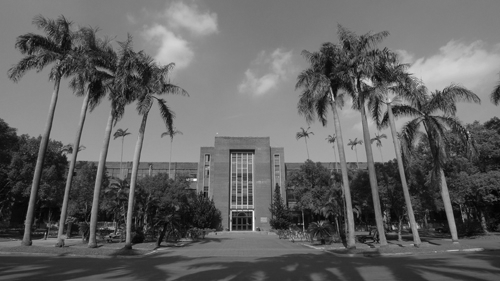

Pixel Intesity:
48
48
Pixel RGB:
[43 56 28]
(43, 56, 28)


In [ ]:
# convert the image into grayscale using 0.2989*R + 0.5870*G + 0.1140*B with dot product np.dot or @
data_gray = np.dot(data, [0.2989, 0.5870, 0.1140])
data_gray = np.uint8(data_gray)
print(data_gray.shape)
# convert to Pillow image with single channel 
image2 = Image.fromarray(data_gray, 'L')
display(image2)

# print pixel intensity value of (200,300)
print("Pixel Intesity:")
print(data_gray[200,300])
print(image2.getpixel((300, 200)))
# print pixel rgb value of (200,300)
print("Pixel RGB:")
print(data[200,300])
print(image.getpixel((300, 200)))


# note that the dimension of pillow image and numpy array are different


# 1.4 Linear System of equations

Matrices can be used to describe a system of linear equations of the form ${Ax}={b}$. Here is such a system:

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_n
$$

The equation system $${Ax}={b}$$ can be wrote in matrix form:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$




# Solving a system of linear equations

The inverse matrix can be used to solve the equation ${Ax}={b}$ by adding it to each term:

$${A}^{-1}{Ax}={A}^{-1}{b}$$

Since by definition that ${A}^{-1}{A}={I}$, we have:

$${x}={A}^{-1}{b}$$

Thus, the linear equation can be solved by computing the inverse of ${A}$ and apply this matrix to the vector of results ${b}$

## Least squares line fitting

Data: $(a_1, b_1)$, ..., $(a_n, b_n)$
Line equation: $b_i = xa_i + c$
, Find (x,c) to minimize
$$E=\sum^{n}_{i=1}(b_i-xa_i-c)^2$$

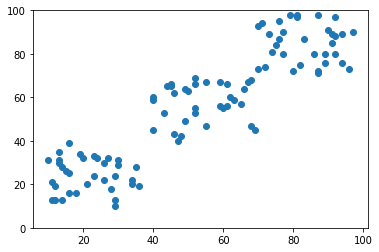

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Input data
A = np.random.randint([10,40,70],[40,70,100], size=(100,1))
B = np.random.randint([10,40,70],[40,70,100], size=(100,1))

plt.scatter(A, B)
plt.ylim(ymin=0)
plt.ylim(ymax=100)
plt.show()

In [ ]:
# Building the model 
A_matrix = np.c_[A, np.ones(100)]

x =  np.dot(np.linalg.pinv(A_matrix), B)

print (x)

[[0.88167211]
 [8.96931371]]


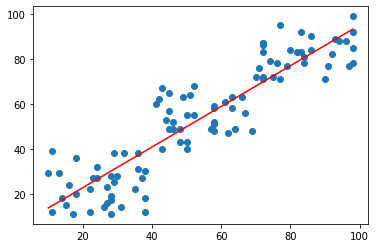

In [ ]:
# Making predictions
# Y_pred = x[0]*A + x[1]
Y_pred = np.dot(A_matrix, x)

plt.scatter(A, B) # actual
plt.plot([min(A), max(A)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# 1.5 Translation, scaling and rotation

Translation using Matrices
$$
P' = P + t = (x + t_x, y + t_y) \\\\
P' \to
\begin{bmatrix}
    x + t_x \\\\
    y + t_y 
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & t_x \\\\
    0 & 1 & t_y 
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y \\\\
    1 
\end{bmatrix}
$$

Scaling Equation using Matrices
$$
P' \to
\begin{bmatrix}
    s_xx  \\\\
    s_yy  \\\\
    1  
\end{bmatrix}
=
\begin{bmatrix}
    s_x & 0 & 0 \\\\
    0 & s_y & 0 \\\\
    0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y \\\\
    1 
\end{bmatrix}
$$
Rotation using Matrices
$$
P' \to
\begin{bmatrix}
    xcos\theta-ysin\theta  \\\\
    xsin\theta+ycos\theta  \\\\
    1  
\end{bmatrix}
=
\begin{bmatrix}
    cos\theta & -sin\theta & 0 \\\\
    sin\theta & cos\theta & 0 \\\\
    0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y \\\\
    1 
\end{bmatrix}
$$



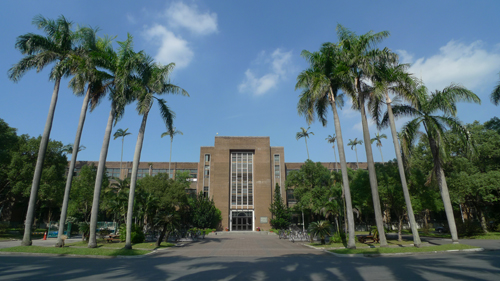

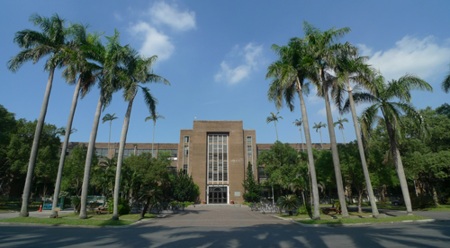

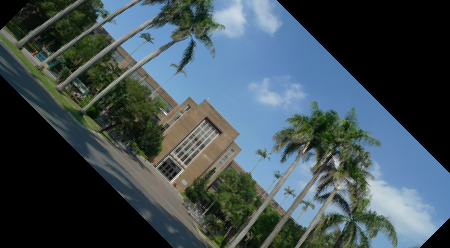

In [ ]:
from PIL import Image
import numpy as np
from numpy import asarray
# Open the image from working directory
# Upload the image using the files tab on the right hand side 
image = Image.open('ntuce.jpg')
# show the image
display(image)
# Change the image into the given size
im_resized = image.resize((450, 248))
# show the image
display(im_resized)
# Rotate the image by 45 degree
im_rotate = im_resized.rotate(-45) 
# show the image
display(im_rotate)

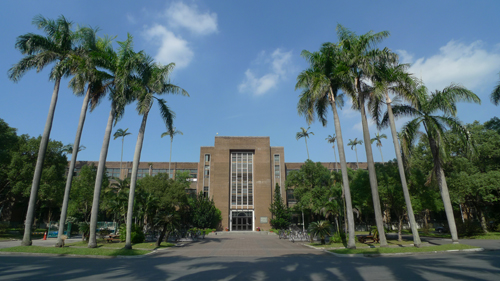

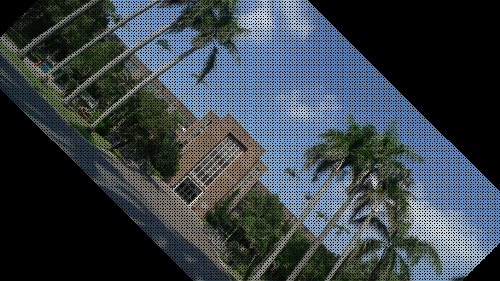

In [ ]:
# 手刻版本
from PIL import Image
import numpy as np
from numpy import asarray
# Open the image from working directory
# Upload the image using the files tab on the right hand side 
image = Image.open('ntuce.jpg')
# show the image
display(image)
# Decide the rotation angle in degree(clockwise) ex.45
degree = 45
# Build a new canvas
rotate_image = Image.new("RGB",(image.width, image.height))
# Choose the pixel as the origin ex. the middle of the picture
x0, y0 = int(image.width/2), int(image.height/2)
for j in range(image.height):
    for i in range(image.width):
        deltax = int((i-x0)*np.cos(degree*2*np.pi/360)-(j-y0)*np.sin(degree*2*np.pi/360))
        deltay = int((i-x0)*np.sin(degree*2*np.pi/360)+(j-y0)*np.cos(degree*2*np.pi/360))
        if (x0+deltax < image.width and x0+deltax >= 0 and y0+deltay < image.height and y0+deltay >= 0):
            rotate_image.putpixel(((x0 + deltax), (y0 + deltay)), (image.getpixel((i, j))))
display(rotate_image)